<a href="https://colab.research.google.com/github/kh9yaz/124Rus/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22ITOI_lab_6_17_04_2023_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Лабораторная работа 6. Сравнение методов построения регрессии </h1>

ФИО
Ефимов Константин Алексеевич
группа
МИЗ 24-01

# imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Смоделируем задачу регрессии

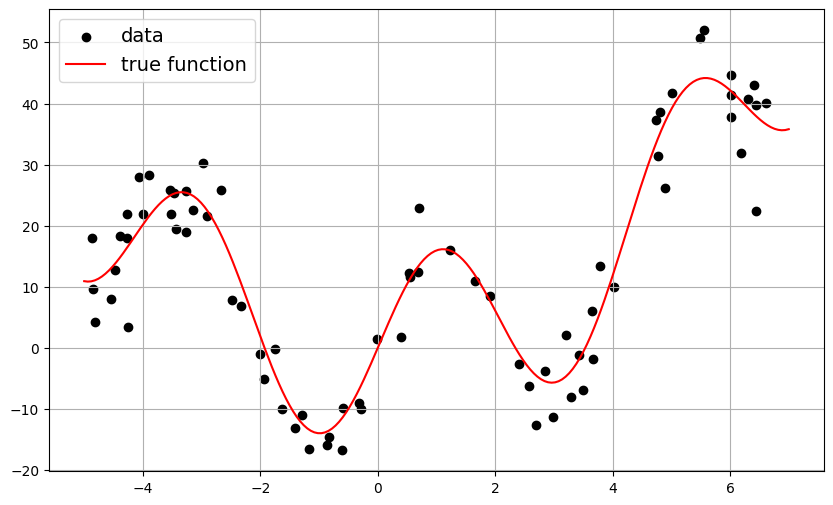

In [ ]:
x_min = -5
x_max = 7
sample_volume = 75

# data
x = np.random.uniform(x_min, x_max, sample_volume)
y = x**2 + 15*np.sin(1.5*x) + np.random.normal(0,5, sample_volume)

# data for plot
x_ = np.linspace(x_min, x_max, 200)
y_ = x_**2 + 15*np.sin(1.5*x_)

fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='black', label='data')
ax.plot(x_,y_, color='red', label='true function')
ax.grid()
ax.legend(fontsize=14)
plt.show()

In [ ]:
data = pd.DataFrame( {'x': x, 'y': y} )
data.head(3)

,x,y
0,0.556436,11.561783
1,3.661635,-1.875968
2,-3.537796,25.863879


# KNN regression

In [ ]:
knn1_regression = KNeighborsRegressor(n_neighbors=1)
knn1_regression.fit(data['x'].values.reshape(-1, 1),
                    data['y'].values.reshape(-1, 1))

print("MSE =", mean_squared_error(data['y'].values.reshape(-1, 1),
                                  knn1_regression.predict(data['x'].values.reshape(-1, 1))))

y_predicted = knn1_regression.predict(x_.reshape(-1, 1))

MSE = 0.0


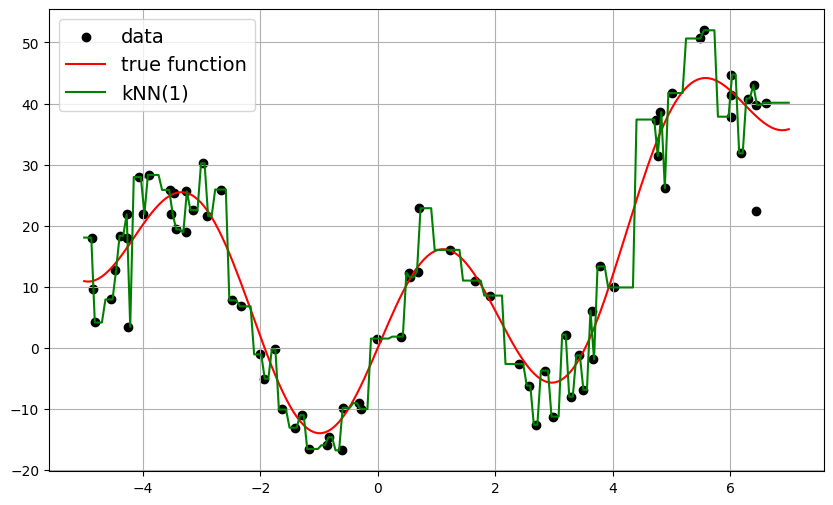

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='black', label='data')
ax.plot(x_,y_, color='red', label='true function')
ax.plot(x_,y_predicted, color='green', label='kNN(1)')
ax.grid()
ax.legend(fontsize=14)
plt.show()

In [ ]:
knn3_regression = KNeighborsRegressor(n_neighbors=3)
knn3_regression.fit(data['x'].values.reshape(-1, 1),
                    data['y'].values.reshape(-1, 1))

print("MSE =", mean_squared_error(data['y'].values.reshape(-1, 1),
                                  knn3_regression.predict(data['x'].values.reshape(-1, 1))))

y_predicted = knn3_regression.predict(x_.reshape(-1, 1))

MSE = 22.320223240013732


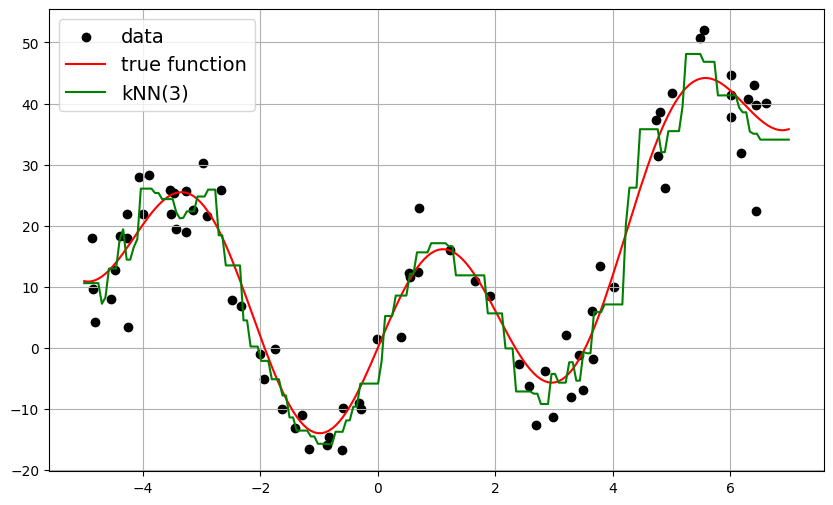

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='black', label='data')
ax.plot(x_,y_, color='red', label='true function')
ax.plot(x_,y_predicted, color='green', label='kNN(3)')
ax.grid()
ax.legend(fontsize=14)
plt.show()

**Задание:**

С помощью кросс-валидации определите оптимальное число соседей в диапазоне $[1,10]$, мера качества - среднеквадратическая ошибка (MSE).

Постройте график с оптимальным числом соседей (график как в примере выше).

Оптимальное число соседей: 1


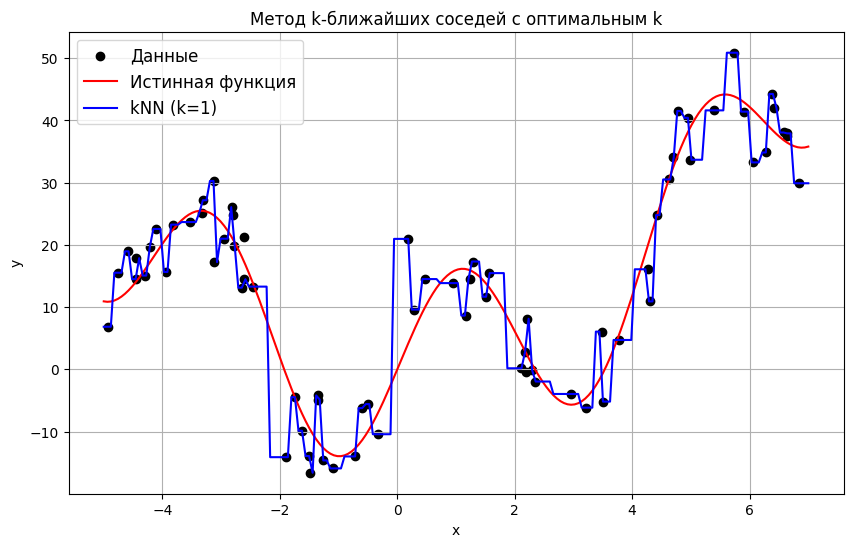

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Данные
np.random.seed(42)
x_min = -5
x_max = 7
sample_volume = 75

x = np.random.uniform(x_min, x_max, sample_volume)
y = x**2 + 15 * np.sin(1.5 * x) + np.random.normal(0, 5, sample_volume)

data = pd.DataFrame({'x': x, 'y': y})

# Генерация данных для графика
x_plot = np.linspace(x_min, x_max, 200)
y_plot = x_plot**2 + 15 * np.sin(1.5 * x_plot)

# Разделение признаков и целевой переменной
X = data[['x']]
y_true = data['y']

# Настройка сетки параметров
param_grid = {'n_neighbors': range(1, 11)}

# Поиск лучшего k с помощью кросс-валидации
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y_true)

# Лучший параметр
best_k = grid_search.best_params_['n_neighbors']
print(f"Оптимальное число соседей: {best_k}")

# Обучаем модель с лучшим k
best_model = grid_search.best_estimator_
y_pred_plot = best_model.predict(x_plot.reshape(-1, 1))

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Данные')
plt.plot(x_plot, y_plot, color='red', label='Истинная функция')
plt.plot(x_plot, y_pred_plot, color='blue', label=f'kNN (k={best_k})')
plt.grid()
plt.legend(fontsize=12)
plt.title("Метод k-ближайших соседей с оптимальным k")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# SVM для регрессии (SVR)

In [ ]:
svr1_regression = SVR(kernel='linear')
svr1_regression.fit(data['x'].values.reshape(-1, 1),
                    data['y'].values.reshape(-1, 1))

print("MSE =", mean_squared_error(data['y'].values.reshape(-1, 1),
                                  svr1_regression.predict(data['x'].values.reshape(-1, 1))))

y_predicted = svr1_regression.predict(x_.reshape(-1, 1))

MSE = 265.8010510097395


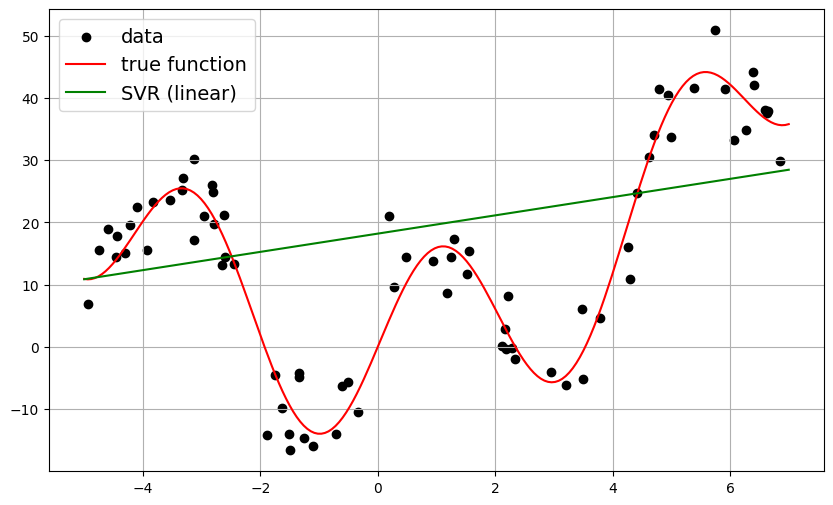

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='black', label='data')
ax.plot(x_,y_, color='red', label='true function')
ax.plot(x_,y_predicted, color='green', label='SVR (linear)')
ax.grid()
ax.legend(fontsize=14)
plt.show()

In [ ]:
svr2_regression = SVR(kernel='poly', degree=2)
svr2_regression.fit(data['x'].values.reshape(-1, 1),
                    data['y'].values.reshape(-1, 1))

print("MSE =", mean_squared_error(data['y'].values.reshape(-1, 1),
                                  svr2_regression.predict(data['x'].values.reshape(-1, 1))))

y_predicted = svr2_regression.predict(x_.reshape(-1, 1))

MSE = 146.45115425630013


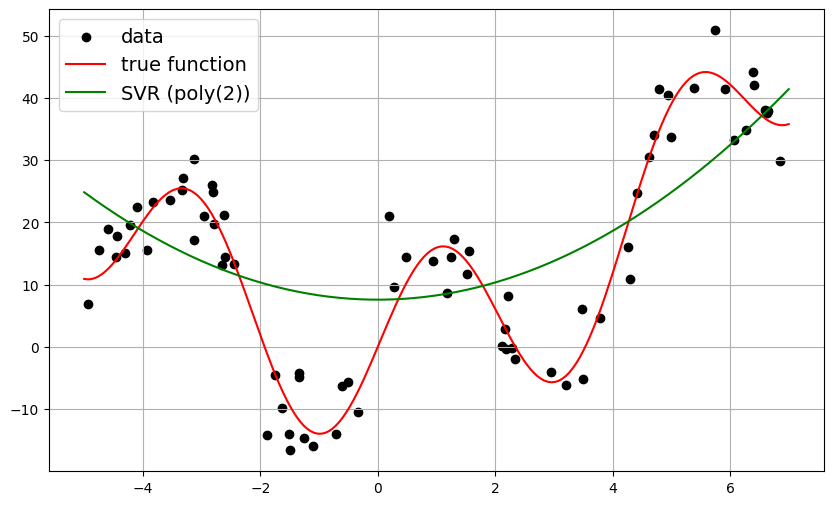

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='black', label='data')
ax.plot(x_,y_, color='red', label='true function')
ax.plot(x_,y_predicted, color='green', label='SVR (poly(2))')
ax.grid()
ax.legend(fontsize=14)
plt.show()

In [ ]:
svr3_regression = SVR(kernel='rbf')
svr3_regression.fit(data['x'].values.reshape(-1, 1),
                    data['y'].values.reshape(-1, 1))

print("MSE =", mean_squared_error(data['y'].values.reshape(-1, 1),
                                  svr3_regression.predict(data['x'].values.reshape(-1, 1))))

y_predicted = svr3_regression.predict(x_.reshape(-1, 1))

MSE = 173.10243029660202


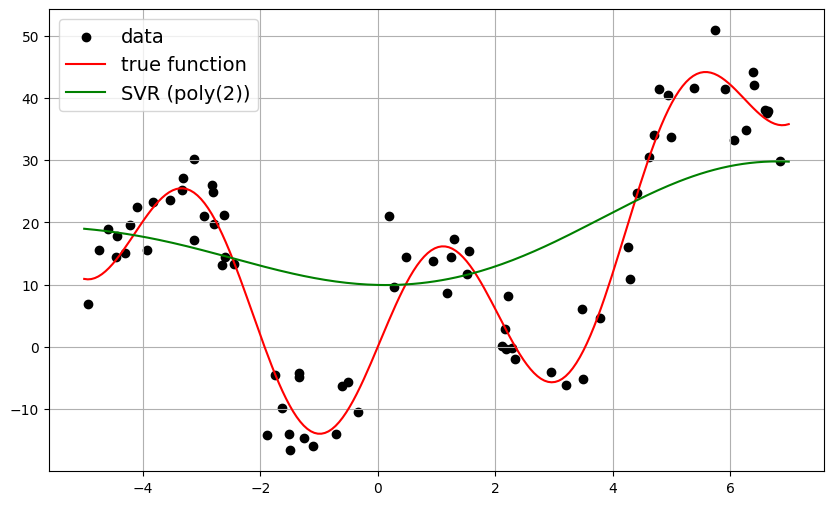

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y, color='black', label='data')
ax.plot(x_,y_, color='red', label='true function')
ax.plot(x_,y_predicted, color='green', label='SVR (poly(2))')
ax.grid()
ax.legend(fontsize=14)
plt.show()

**Задание:**

1. Масштабируйте данные используя StandardScaler()

2. С помощью кроссвалидации и поиска по решетке подберите оптимальное ядро из [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]

3. Восстановите масштаб, постройте график как примерах выше.

Лучшие параметры: {'svr__C': 10, 'svr__degree': 2, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf'}
MSE на обучающих данных: 110.1181866199186


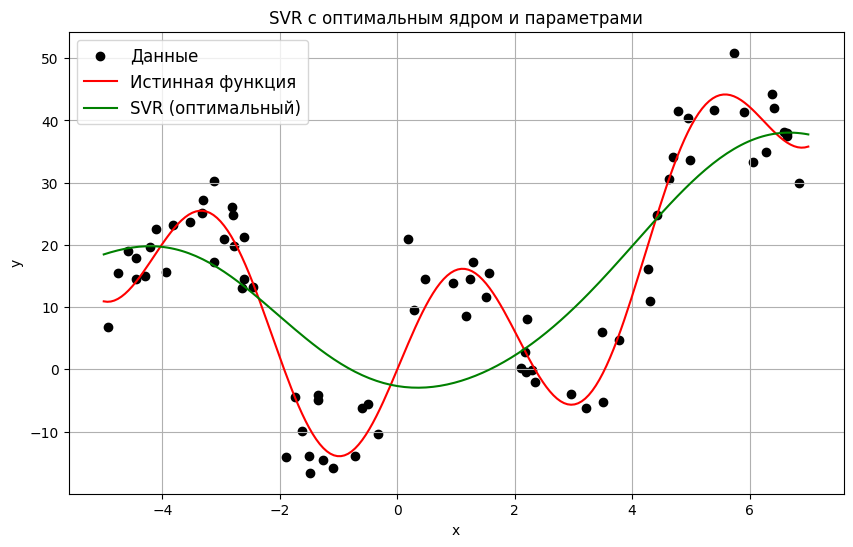

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Данные
np.random.seed(42)
x_min = -5
x_max = 7
sample_volume = 75

x = np.random.uniform(x_min, x_max, sample_volume)
y = x**2 + 15 * np.sin(1.5 * x) + np.random.normal(0, 5, sample_volume)

data = pd.DataFrame({'x': x, 'y': y})

# Генерация данных для графика
x_plot = np.linspace(x_min, x_max, 200)
y_plot = x_plot**2 + 15 * np.sin(1.5 * x_plot)

# Разделение признаков и целевой переменной
X = data[['x']]
y_true = data['y']

# Создаем пайплайн: масштабирование + SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Параметры для поиска
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__degree': [2, 3]  # только для полиномиального ядра
}

# Поиск наилучшей модели
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y_true)

# Лучшая модель
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на сетке
y_pred_plot = best_model.predict(x_plot.reshape(-1, 1))

# Оценка MSE на обучающей выборке
y_train_pred = best_model.predict(X)
train_mse = mean_squared_error(y_true, y_train_pred)
print("MSE на обучающих данных:", train_mse)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Данные')
plt.plot(x_plot, y_plot, color='red', label='Истинная функция')
plt.plot(x_plot, y_pred_plot, color='green', label='SVR (оптимальный)')
plt.grid()
plt.legend(fontsize=12)
plt.title("SVR с оптимальным ядром и параметрами")
plt.xlabel("x")
plt.ylabel("y")
plt.show()